# About this Notebook:
In this notebook, I am creating a new dataset "Combined_MRIdataset.csv". 
I had a dataset given for Image Analysis Lab through coursera. This includes DICOM files (MRI Scans) of a Patient. (Dataset in Input - head_mri). I uploaded this through my local computer. 
Another dataset is multiple-sclerosis dataset through Kaggle.

# Why is it required to combine these datasets. 
Each datasets contained records for two different patients examined for different scenarios. I want to analyze more data of MRI scans and this is the reason for combining datasets.

Each dataset contains multiple DICOM files for the patients. (176 and 381 rows)

Each datasets contain matching columns as well as unique columns. While combining all matching columns are included in the new datasets. Few additional important columns are also added to the new dataset for data analysis.

# Data Cleaning.
Many NaN values exists in the additional columns where there are no corresponding data for the patients.
Also, some columns are already missing values in both datasets.

# Need for more data.
In future if more data are available, they can be added to this new dataset accordingly for model development and prediction. 

# Image Analysis Visualization can be created for both the patients sepearatly as well.

# EDA - Exploratory data analysis scenarios can be created to reveal insights and patterns using MRI scan parameters.




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom # Pydicom is a Python package for working with DICOM files
# ITK (Insight Segmentation and Registration Toolkit) is a library that enables image processing, and it is widely used for the development of image segmentation and image registration programs. 
#Here, we'll use SimpleITK, as it is a simplified interface to ITK.
import SimpleITK
import os
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Walk through the directory to find all DICOM files 
PathDicom = "/kaggle/input/multiple-sclerosis-dataset"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file is DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Create a list called 'lstFilesDCM' that is initially empty. Use the os.walk() function from the OS module to traverse the multiple-sclerosis-dataset kaggle input. For each file found in this folder, we check whether it is a DICOM file, and if it is, we add its extended name (i.e. the folder and file name) to the lstFilesDCM list.

In [2]:
# Check the number of DICOM files found 
print(f"Total DICOM files found: {len(lstFilesDCM)}")

Total DICOM files found: 381


In [3]:
lstFilesDCM[:5]

['/kaggle/input/multiple-sclerosis-dataset/ST000001/SE000006/IM000001.dcm',
 '/kaggle/input/multiple-sclerosis-dataset/ST000001/SE000006/IM000025.dcm',
 '/kaggle/input/multiple-sclerosis-dataset/ST000001/SE000006/IM000003.dcm',
 '/kaggle/input/multiple-sclerosis-dataset/ST000001/SE000006/IM000014.dcm',
 '/kaggle/input/multiple-sclerosis-dataset/ST000001/SE000006/IM000024.dcm']

## Reading a DICOM file

In [4]:
data_onefile = pydicom.dcmread(lstFilesDCM[0])
#data_onefile
print(data_onefile.PatientPosition)
print(data_onefile.StudyDate)

HFS
20231101


## Reading data for 5 files

In [5]:
num_of_files = 1
for i in range(num_of_files):
    data = pydicom.dcmread(lstFilesDCM[i])
    print(f"Data for file {i + 1}:") 
    print(data) 
    print("\n" + "="*50 + "\n")

Data for file 1:
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 198
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.4087122745.11320.1706772657.3418
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.6
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_366'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_IR', 'M', 'IR']
(0008,0012) Instance Creation Date              DA: '20231101'
(0008,0013) Instance Creation Time              TM: '192646.232'
(0008,0014) Instance Creator UID                UI: 1.3.46.670589.11.

# Function to process the DICOM files and extract all relevant Pixel and Metadata

In [6]:
# Function to process the DICOM files and extract all relevant data
def process_dicom(PathDicom):
    ds = pydicom.dcmread(PathDicom)
    '''
    # Extract specific metadata 
    metadata = { "PatientID": ds.PatientID if 'PatientID' in ds else 'N/A', 
            "StudyDate": ds.StudyDate if 'StudyDate' in ds else 'N/A', 
            "Modality": ds.Modality if 'Modality' in ds else 'N/A', 
            "Manufacturer": ds.Manufacturer if 'Manufacturer' in ds else 'N/A', 
            "PixelData": ds.pixel_array.flatten().tolist() if hasattr(ds, 'pixel_array') else 'N/A'
            # Flatten pixel data for CSV 
            } 
    return metadata
    '''
    
    # Extract pixel data
    pixel_data = ds.pixel_array.flatten().tolist()  # Convert to list for CSV compatibility
    
    # Extract metadata
    metadata = {tag: str(ds.data_element(tag).value) for tag in ds.dir()}
    
    # Combine pixel data and metadata
    metadata.update({"PixelData": pixel_data})
    
    return metadata

In [7]:
# Test code, to only print PatientID
data = []
data = [process_dicom(file) for file in lstFilesDCM]
#data

# Print the data for inspection 
for idx, dicom_data in enumerate(data[:5]): 
    print(f"Data for DICOM file {idx + 1}:") 
    for key, value in dicom_data.items(): 
        if key == "PatientID": 
            print(f"{key}: {(value)}...") 

Data for DICOM file 1:
PatientID: 049dacd8766cf741ad32d3a3049e49528dc342646d0ecc6f2d75820e...
Data for DICOM file 2:
PatientID: 049dacd8766cf741ad32d3a3049e49528dc342646d0ecc6f2d75820e...
Data for DICOM file 3:
PatientID: 049dacd8766cf741ad32d3a3049e49528dc342646d0ecc6f2d75820e...
Data for DICOM file 4:
PatientID: 049dacd8766cf741ad32d3a3049e49528dc342646d0ecc6f2d75820e...
Data for DICOM file 5:
PatientID: 049dacd8766cf741ad32d3a3049e49528dc342646d0ecc6f2d75820e...


In [8]:
# Process each DICOM file and collect data
data = []
data = [process_dicom(file) for file in lstFilesDCM]
#data
'''
# Print the data for inspection 
for idx, dicom_data in enumerate(data): 
    print(f"Data for DICOM file {idx + 1}:") 
    for key, value in dicom_data.items(): 
        if key == "PixelData": 
            print(f"{key}: {str(value)[:100]}...") 
            # Truncate long pixel data for readability 
        else: 
            print(f"{key}: {value}") 
            print("\n" + "="*50 + "\n")
'''
# Create a DataFrame from the collected data 
df_KaggleMRI = pd.DataFrame(data) 
# Save the DataFrame to a CSV file 
csv_file_path = 'KaggleMRI_new.csv' 
df_KaggleMRI.to_csv(csv_file_path, index=False) 
print(f"Data successfully saved to {csv_file_path}")

Data successfully saved to KaggleMRI_new.csv


# Check the columns in Kaggle Multiple-Sclerosis dataset along with its info

In [9]:
# Get a Series with the column names and their data types 
print(df_KaggleMRI.dtypes)
print(df_KaggleMRI.info())

AccessionNumber                 object
AcquisitionDate                 object
AcquisitionDuration             object
AcquisitionMatrix               object
AcquisitionNumber               object
                                 ...  
ImageComments                   object
LossyImageCompression           object
SequenceName                    object
TransmitCoilName                object
WindowCenterWidthExplanation    object
Length: 166, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Columns: 166 entries, AccessionNumber to WindowCenterWidthExplanation
dtypes: object(166)
memory usage: 494.2+ KB
None


In [10]:
df_KaggleMRI.columns.to_list()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionDuration',
 'AcquisitionMatrix',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AdditionalPatientHistory',
 'AdmittingDiagnosesDescription',
 'Allergies',
 'B1rms',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'CodeMeaning',
 'CodeValue',
 'CodingSchemeDesignator',
 'Columns',
 'CommentsOnThePerformedProcedureStep',
 'ContentDate',
 'ContentTime',
 'ContrastBolusAgent',
 'ConversionType',
 'DeviceSerialNumber',
 'DiffusionBValue',
 'DiffusionGradientOrientation',
 'DigitalImageFormatAcquired',
 'EchoNumbers',
 'EchoTime',
 'EchoTrainLength',
 'EthnicGroup',
 'FlipAngle',
 'FrameOfReferenceUID',
 'HeartRate',
 'HighBit',
 'HighRRValue',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagingFrequency',
 'ImagingServiceRequestComments',
 'InPlanePhaseEncodingDirection',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceCreatorUID',
 'InstanceNumber',
 'InstitutionAddress',
 'Insti

## Load another MRI dataset

In [11]:
df_MYMRI = pd.read_csv('/kaggle/input/head-mri/MyMRI_new.csv')
# Get the statistical description of all the features
print(df_MYMRI.head())
print(df_MYMRI.info())
print(df_MYMRI.dtypes)

   AccessionNumber  AcquisitionDate AcquisitionMatrix  AcquisitionNumber  \
0   19078400556130         20111110  [0, 256, 250, 0]                  1   
1   19078400556130         20111110  [0, 256, 250, 0]                  1   
2   19078400556130         20111110  [0, 256, 250, 0]                  1   
3   19078400556130         20111110  [0, 256, 250, 0]                  1   
4   19078400556130         20111110  [0, 256, 250, 0]                  1   

   AcquisitionTime AngioFlag  BitsAllocated  BitsStored  Columns  ContentDate  \
0        93522.335         N             16          12      256     20111110   
1        93522.335         N             16          12      256     20111110   
2        93522.335         N             16          12      256     20111110   
3        93522.335         N             16          12      256     20111110   
4        93522.335         N             16          12      256     20111110   

   ...         StudyID                                  

## Selecting Common Columns from Both CSV files

In [12]:
common_columns = set(df_MYMRI.columns).intersection(df_KaggleMRI.columns)
print(common_columns)

{'AcquisitionDate', 'InstitutionAddress', 'NumberOfAverages', 'PixelData', 'StudyTime', 'SliceThickness', 'PatientWeight', 'RepetitionTime', 'SeriesTime', 'SequenceName', 'PhotometricInterpretation', 'ProtocolName', 'InstanceNumber', 'SequenceVariant', 'Modality', 'SamplesPerPixel', 'ReferringPhysicianName', 'Columns', 'InPlanePhaseEncodingDirection', 'ImageOrientationPatient', 'RequestingService', 'SeriesDate', 'PixelRepresentation', 'FlipAngle', 'FrameOfReferenceUID', 'PixelBandwidth', 'ContentTime', 'PerformedProcedureStepStartTime', 'SOPInstanceUID', 'EchoNumbers', 'PatientID', 'ImagingFrequency', 'PatientAge', 'ImageType', 'EchoTrainLength', 'Rows', 'SeriesNumber', 'InstitutionalDepartmentName', 'ScanningSequence', 'AcquisitionNumber', 'TransmitCoilName', 'AccessionNumber', 'SeriesDescription', 'PatientBirthDate', 'InstanceCreationTime', 'SAR', 'InstanceCreationDate', 'PerformedProcedureStepDescription', 'StudyID', 'PositionReferenceIndicator', 'PerformedProcedureStepStartDate', '

## Find columns that are unique to them in both datasets

In [13]:
cols_unique_kaggle = set(df_KaggleMRI.columns) - set(df_MYMRI.columns)
cols_unique_my = set(df_MYMRI.columns) - set(df_KaggleMRI.columns)
print("My cols", cols_unique_my)
print()
print("Kaggle Cols",cols_unique_kaggle)

My cols {'AngioFlag', 'PhysiciansOfRecord', 'ReferencedStudySequence', 'StudyStatusID', 'IssuerOfPatientID', 'LargestImagePixelValue', 'VariableFlipAngleFlag', 'PatientAddress', 'PatientBirthTime', 'SmallestImagePixelValue'}

Kaggle Cols {'CodeValue', 'PatientTransportArrangements', 'HighRRValue', 'IssueDateOfImagingServiceRequest', 'AdditionalPatientHistory', 'PerformedProcedureStepEndTime', 'DiffusionGradientOrientation', 'RequestedProcedureLocation', 'PerformedProcedureStepStatus', 'Allergies', 'Occupation', 'OrderCallbackPhoneNumber', 'Laterality', 'LossyImageCompression', 'RescaleType', 'B1rms', 'PregnancyStatus', 'SpacingBetweenSlices', 'RescaleIntercept', 'RescaleSlope', 'PerformedProtocolCodeSequence', 'OperatorsName', 'CodingSchemeDesignator', 'RequestedProcedurePriority', 'StudyComments', 'SecondaryCaptureDeviceID', 'PatientState', 'IntervalsRejected', 'PerformedStationAETitle', 'DiffusionBValue', 'AdmittingDiagnosesDescription', 'PerformedLocation', 'AcquisitionDuration', 'L

## Get common columns from both datasets

In [14]:
# Find common columns
common_columns = df_KaggleMRI.columns.intersection(df_MYMRI.columns)

print("Common Columns:", common_columns)


Common Columns: Index(['AccessionNumber', 'AcquisitionDate', 'AcquisitionMatrix',
       'AcquisitionNumber', 'AcquisitionTime', 'BitsAllocated', 'BitsStored',
       'Columns', 'ContentDate', 'ContentTime', 'DeviceSerialNumber',
       'EchoNumbers', 'EchoTime', 'EchoTrainLength', 'FlipAngle',
       'FrameOfReferenceUID', 'HighBit', 'ImageOrientationPatient',
       'ImagePositionPatient', 'ImageType', 'ImagedNucleus',
       'ImagingFrequency', 'InPlanePhaseEncodingDirection',
       'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber',
       'InstitutionAddress', 'InstitutionName', 'InstitutionalDepartmentName',
       'InversionTime', 'MRAcquisitionType', 'MagneticFieldStrength',
       'Manufacturer', 'ManufacturerModelName', 'Modality', 'NumberOfAverages',
       'NumberOfPhaseEncodingSteps', 'PatientAge', 'PatientBirthDate',
       'PatientID', 'PatientName', 'PatientPosition', 'PatientSex',
       'PatientWeight', 'PercentPhaseFieldOfView', 'PercentSampling',
    

## Create new DataFrames with only the matching columns


# Add additional required columns which are unique to the source datasets to the new combined dataset. Below I have included few additonal columns from KaggleMRI dataset.

In [15]:
additional_columns = ['DiffusionGradientOrientation', 'DiffusionBValue','RescaleType','BodyPartExamined','SpacingBetweenSlices','HeartRate'] 

# Create subset DataFrames 
df_kaggle_common = df_KaggleMRI[common_columns.union(additional_columns)] 

#df_kaggle_common = df_KaggleMRI[common_columns + additional_columns]
df_my_common = df_MYMRI[common_columns]

## Verify the new dataframes created

In [16]:
print('df_kaggle_common', df_kaggle_common.head())
print('df_my_common', df_my_common.head())

df_kaggle_common   AccessionNumber AcquisitionDate AcquisitionMatrix AcquisitionNumber  \
0        Labutina        20231101  [0, 260, 162, 0]                13   
1        Labutina        20231101  [0, 260, 162, 0]                13   
2        Labutina        20231101  [0, 260, 162, 0]                13   
3        Labutina        20231101  [0, 260, 162, 0]                13   
4        Labutina        20231101  [0, 260, 162, 0]                13   

  AcquisitionTime BitsAllocated BitsStored BodyPartExamined Columns  \
0       192355.99            16         12           CSPINE     336   
1       192355.99            16         12           CSPINE     336   
2       192355.99            16         12           CSPINE     336   
3       192355.99            16         12           CSPINE     336   
4       192355.99            16         12           CSPINE     336   

  ContentDate  ... StudyDate              StudyDescription StudyID  \
0    20231101  ...  20231101  head SD+C-spine+T

## Combine both dataframe to one
Combine: Concatenate the two DataFrames, which will not duplicate columns since both DataFrames now have the same structure.

In [17]:
# Concatenate the two DataFrames (along rows)
df_combined_MRI = pd.concat([df_kaggle_common, df_my_common], ignore_index=True)

print(df_combined_MRI.columns)
print(df_combined_MRI.shape)

# Save the combined DataFrame
df_combined_MRI.to_csv('combined_MRIdataset.csv', index=False)
print("Combined dataset saved as 'combined_MRIdataset.csv'")


Index(['AccessionNumber', 'AcquisitionDate', 'AcquisitionMatrix',
       'AcquisitionNumber', 'AcquisitionTime', 'BitsAllocated', 'BitsStored',
       'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime',
       'DeviceSerialNumber', 'DiffusionBValue', 'DiffusionGradientOrientation',
       'EchoNumbers', 'EchoTime', 'EchoTrainLength', 'FlipAngle',
       'FrameOfReferenceUID', 'HeartRate', 'HighBit',
       'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType',
       'ImagedNucleus', 'ImagingFrequency', 'InPlanePhaseEncodingDirection',
       'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber',
       'InstitutionAddress', 'InstitutionName', 'InstitutionalDepartmentName',
       'InversionTime', 'MRAcquisitionType', 'MagneticFieldStrength',
       'Manufacturer', 'ManufacturerModelName', 'Modality', 'NumberOfAverages',
       'NumberOfPhaseEncodingSteps', 'PatientAge', 'PatientBirthDate',
       'PatientID', 'PatientName', 'PatientPosition', 'PatientSex',

## Study Description column: What it means: Combined dataset has this column

The term "Schädel - Neuro^Orbita" in an MRI scan StudyDescription refers to specific areas of the head being imaged:

- **Schädel**: This is the German word for "skull." It indicates that the MRI scan includes imaging of the skull.
- **Neuro**: Refers to the brain or neurological structures.
- **Orbita**: Refers to the eye sockets or orbits.

So, "Schädel - Neuro^Orbita" means that the MRI scan includes imaging of the skull, brain, and eye sockets. This type of scan is useful for examining conditions affecting these areas, such as tumors, injuries, or other abnormalities.

The term "head SD+C-spine+Th-spine+C20" in an MRI scan StudyDescription typically refers to the specific areas of the body that were imaged during the MRI scan. Here's a breakdown of what each part might mean:

- **Head**: Indicates that the MRI scan includes imaging of the head.
- **SD**: Could refer to a specific sequence or type of imaging used, such as "Spin Density" (SD) weighted imaging.
- **C-spine**: Stands for "Cervical Spine," which is the neck region of the spine.
- **Th-spine**: Stands for "Thoracic Spine," which is the upper and middle back region of the spine.
- **C20**: Refers to the 20th thoracic vertebra in the spine.

So, the StudyDescription "head SD+C-spine+Th-spine+C20" means that the MRI scan included imaging of the head using a specific sequence, as well as the cervical and thoracic spine regions, specifically focusing on the 20th thoracic vertebra.


## Analyse combinedMRI dataset

In [18]:
print(df_combined_MRI.head())
print(df_combined_MRI.tail())

#check for additional columns data values for both patients
df_combined_MRI[['PatientID','PerformedProcedureStepDescription','DiffusionGradientOrientation', 'DiffusionBValue','RescaleType','BodyPartExamined','SpacingBetweenSlices','HeartRate']]

  AccessionNumber AcquisitionDate AcquisitionMatrix AcquisitionNumber  \
0        Labutina        20231101  [0, 260, 162, 0]                13   
1        Labutina        20231101  [0, 260, 162, 0]                13   
2        Labutina        20231101  [0, 260, 162, 0]                13   
3        Labutina        20231101  [0, 260, 162, 0]                13   
4        Labutina        20231101  [0, 260, 162, 0]                13   

  AcquisitionTime BitsAllocated BitsStored BodyPartExamined Columns  \
0       192355.99            16         12           CSPINE     336   
1       192355.99            16         12           CSPINE     336   
2       192355.99            16         12           CSPINE     336   
3       192355.99            16         12           CSPINE     336   
4       192355.99            16         12           CSPINE     336   

  ContentDate  ... StudyDate              StudyDescription StudyID  \
0    20231101  ...  20231101  head SD+C-spine+Th-spine+C20      

,PatientID,PerformedProcedureStepDescription,DiffusionGradientOrientation,DiffusionBValue,RescaleType,BodyPartExamined,SpacingBetweenSlices,HeartRate
0,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,head SD+C-spine+Th-spine+C20,"[0.0, 0.0, 0.0]",0.0,normalized,CSPINE,6,0
1,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,head SD+C-spine+Th-spine+C20,"[0.0, 0.0, 0.0]",0.0,normalized,CSPINE,6,0
2,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,head SD+C-spine+Th-spine+C20,"[0.0, 0.0, 0.0]",0.0,normalized,CSPINE,6,0
3,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,head SD+C-spine+Th-spine+C20,"[0.0, 0.0, 0.0]",0.0,normalized,CSPINE,6,0
4,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,head SD+C-spine+Th-spine+C20,"[0.0, 0.0, 0.0]",0.0,normalized,CSPINE,6,0
...,...,...,...,...,...,...,...,...
552,556130,MRI Orbita,NaN,NaN,NaN,NaN,NaN,NaN
553,556130,MRI Orbita,NaN,NaN,NaN,NaN,NaN,NaN
554,556130,MRI Orbita,NaN,NaN,NaN,NaN,NaN,NaN
555,556130,MRI Orbita,NaN,NaN,NaN,NaN,NaN,NaN


# Get the new dataset info

In [19]:
df_combined_MRI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 100 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   AccessionNumber                    557 non-null    object
 1   AcquisitionDate                    557 non-null    object
 2   AcquisitionMatrix                  557 non-null    object
 3   AcquisitionNumber                  557 non-null    object
 4   AcquisitionTime                    557 non-null    object
 5   BitsAllocated                      557 non-null    object
 6   BitsStored                         557 non-null    object
 7   BodyPartExamined                   381 non-null    object
 8   Columns                            557 non-null    object
 9   ContentDate                        557 non-null    object
 10  ContentTime                        557 non-null    object
 11  DeviceSerialNumber                 557 non-null    object
 12  Diffusi

## Data Cleaning

Check for Null values in cloumns

In [20]:
df_combined_MRI.isnull().sum()

AccessionNumber                   0
AcquisitionDate                   0
AcquisitionMatrix                 0
AcquisitionNumber                 0
AcquisitionTime                   0
                               ... 
TransmitCoilName                306
WindowCenter                      0
WindowCenterWidthExplanation    306
WindowWidth                       0
dBdt                              0
Length: 100, dtype: int64

# Identify the values in columns with NULL or NaN and do the data cleaning

# Understanding the columns values in detail to populate or handle Null NaN.

In [21]:
df_combined_MRI[['WindowCenterWidthExplanation','PatientID']]
# WindowCenterWidthExplanation has Nan values for one patient, Algo1 for another

df_combined_MRI[['TransmitCoilName','PatientID']]
# TransmitCoilName has Nan and Body values

df_combined_MRI[['SequenceName','PatientID']]
# Sequence Name has NaN values and spcir3d1_274ns. 
# we can replace it with a value of 'SPGR' TO MATCH WITH sequence varaint SK.

df_combined_MRI[['SequenceVariant','SequenceName','PatientID']]

# Not empty
df_combined_MRI[['PercentPhaseFieldOfView','PatientID']]
#- **Definition**: Indicates the percentage of the field of view (FOV) used in the phase encoding direction relative to the full field of view.
# **Significance**: Adjusting this parameter can help reduce scan time and improve image resolution. A value less than 100% means that only a portion of the FOV is sampled, which can be useful for imaging smaller regions of interest without unnecessary data.

df_combined_MRI[['PercentSampling','PatientID']]
#- **Definition**: Indicates the percentage of the k-space data that is actually sampled during the scan.
# **Significance**: Higher sampling percentages result in higher resolution images, while lower percentages can reduce scan time but may also lead to reduced image quality. It's a trade-off between image resolution and acquisition speed.


df_combined_MRI[['StudyID','PatientID']]
#It has null for one patient. Can be populated with patienid - its a unique id

df_combined_MRI[['RequestingService','PatientID']]
# Its null and unknown- not very mandatory

df_combined_MRI[['RequestedProcedureDescription','PatientID']]
# we can have values of MRI Brain

df_combined_MRI[['ReferringPhysicianName','PatientID']]
# we can have Anonymous for missing rows

df_combined_MRI[['PositionReferenceIndicator','PatientID']]
# can be removed - no values

df_combined_MRI[['PerformedProcedureStepID','PatientID']]
#this can be patiendid, other one has 19078400556130 - last 6 digits patientid

df_combined_MRI[['InstitutionAddress', 'InstitutionName', 'InstitutionalDepartmentName','PatientID']]
# One patient has these values. Bahnhofsplatz 3,Zuerich/5EB7E0/,Zuerich,CH,ZIP	MRI Bahnhofplatz	MR3_HB	556130
# we can update Anonymous

df_combined_MRI[['Rows','Columns','PatientID']]

df_combined_MRI[['PhotometricInterpretation','PatientID']]
#Monochrome2 value for both

# There are new columns added. so for one patient these values are null. or NAN.
df_combined_MRI[['PatientID','PerformedProcedureStepDescription','DiffusionGradientOrientation', 'DiffusionBValue','RescaleType','BodyPartExamined','SpacingBetweenSlices','HeartRate']]


,PatientID,PerformedProcedureStepDescription,DiffusionGradientOrientation,DiffusionBValue,RescaleType,BodyPartExamined,SpacingBetweenSlices,HeartRate
0,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,head SD+C-spine+Th-spine+C20,"[0.0, 0.0, 0.0]",0.0,normalized,CSPINE,6,0
1,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,head SD+C-spine+Th-spine+C20,"[0.0, 0.0, 0.0]",0.0,normalized,CSPINE,6,0
2,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,head SD+C-spine+Th-spine+C20,"[0.0, 0.0, 0.0]",0.0,normalized,CSPINE,6,0
3,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,head SD+C-spine+Th-spine+C20,"[0.0, 0.0, 0.0]",0.0,normalized,CSPINE,6,0
4,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,head SD+C-spine+Th-spine+C20,"[0.0, 0.0, 0.0]",0.0,normalized,CSPINE,6,0
...,...,...,...,...,...,...,...,...
552,556130,MRI Orbita,NaN,NaN,NaN,NaN,NaN,NaN
553,556130,MRI Orbita,NaN,NaN,NaN,NaN,NaN,NaN
554,556130,MRI Orbita,NaN,NaN,NaN,NaN,NaN,NaN
555,556130,MRI Orbita,NaN,NaN,NaN,NaN,NaN,NaN


## Fix data types of columns

In [22]:
df_combined_MRI['EchoTime'] = df_combined_MRI['EchoTime'].astype('float')

df_combined_MRI['SliceThickness'] = df_combined_MRI['SliceThickness'].astype('int')

## Important Analysis Columns

### Key Columns for Tumor Detection:

- **ImagePositionPatient** and **ImageOrientationPatient**: Reconstruct 3D positions to visualize and locate tumors.
- **EchoTime (TE)** and **RepetitionTime (TR)**: Analyze differences in signal characteristics that can highlight abnormalities.
- **SliceThickness** and **PixelSpacing**: Determine the resolution and spacing of the images, essential for identifying fine details.
- **ProtocolName** and **SequenceName**: Understand the specific MRI sequences used to ensure appropriate diagnostic protocols.

In [23]:
#Important Columns for analysis
print(df_combined_MRI[['ImagePositionPatient','ImageOrientationPatient','PatientID']])

df_combined_MRI[['ImagedNucleus','ImagingFrequency','PatientID']]

print(df_combined_MRI[['EchoNumbers', 'EchoTime', 'EchoTrainLength','PatientID']])

#print(len(lstFilesDCM))

print(df_combined_MRI[['ProtocolName','SliceThickness','PatientID']])

print(df_combined_MRI['SliceThickness'].value_counts())
# protocol Name Interpretation:
### 1. **cs_FLAIR no FS**:
#**cs_FLAIR**: This MRI scan is designed to clearly show areas of the brain by making the fluid that surrounds the brain and spinal cord look dark. This helps in seeing things like lesions or abnormalities more easily.
# **no FS**: It means that this scan does not use a technique to make fat appear darker. So, you will see the normal fat signals in the images.

### 2. **t2_spc_flair_irprep_sag_p2_iso**:
# **t2_spc**: This part indicates that the scan is specifically designed to highlight water content in tissues. It's useful for detecting things like tumors or inflammation.
# **FLAIR**: As mentioned before, it makes the fluid around the brain and spinal cord look dark, which is great for spotting abnormalities.
# **irprep**: This means the scan is prepared in a special way to get a better look at pressure conditions inside the brain.
# **sag**: This tells you that the images are taken from the side view of the head.
# **p2_iso**: This means the scan is done in such a way that the details are equally clear in all directions.

#So, in simpler terms, both of these scans are advanced ways of capturing 
#detailed images of your brain or spine to help doctors detect any problems like tumors, swelling, or other abnormalities. They use specific techniques to make certain areas or tissues stand out more clearly in the images.

df_combined_MRI[['FlipAngle', 'FrameOfReferenceUID', 'HighBit','PatientID']]

                                  ImagePositionPatient  \
0    [-107.18012241337, -138.77038532207, 80.171688...   
1    [-104.41016534779, -133.95480876872, 224.06447...   
2    [-106.94929269764, -138.36908775279, 92.162754...   
3    [-105.67972902271, -136.16194778392, 158.11361...   
4    [-104.52558032486, -134.15545707652, 218.06895...   
..                                                 ...   
552    ['79.5', '-139.84337329865', '116.90361404419']   
553   ['-10.5', '-139.84337329865', '116.90361404419']   
554    ['70.5', '-139.84337329865', '116.90361404419']   
555     ['7.5', '-139.84337329865', '116.90361404419']   
556   ['-28.5', '-139.84337329865', '116.90361404419']   

                               ImageOrientationPatient  \
0    [0.99529600143432, 0.09427609294652, -0.022314...   
1    [0.99529600143432, 0.09427609294652, -0.022314...   
2    [0.99529600143432, 0.09427609294652, -0.022314...   
3    [0.99529600143432, 0.09427609294652, -0.022314...   
4    [0.99529

,FlipAngle,FrameOfReferenceUID,HighBit,PatientID
0,90,1.3.46.670589.11.21624.5.0.1136.20231101184825...,11,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...
1,90,1.3.46.670589.11.21624.5.0.1136.20231101184825...,11,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...
2,90,1.3.46.670589.11.21624.5.0.1136.20231101184825...,11,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...
3,90,1.3.46.670589.11.21624.5.0.1136.20231101184825...,11,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...
4,90,1.3.46.670589.11.21624.5.0.1136.20231101184825...,11,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...
...,...,...,...,...
552,120,1.3.12.2.1107.5.2.30.25591.1.20111110093416406...,11,556130
553,120,1.3.12.2.1107.5.2.30.25591.1.20111110093416406...,11,556130
554,120,1.3.12.2.1107.5.2.30.25591.1.20111110093416406...,11,556130
555,120,1.3.12.2.1107.5.2.30.25591.1.20111110093416406...,11,556130


## Exploratory Data Analysis

## Visualizations to reveal Insights and Patterns


# **Histograms**:
   - **What it shows**: Frequency distribution of parameters such as EchoTime or FlipAngle.
   - **Usage**: Understand the distribution and range of specific MRI parameters.


                                             PatientID  EchoTime
0    049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...     120.0
1    049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...     120.0
2    049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...     120.0
3    049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...     120.0
4    049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...     120.0
..                                                 ...       ...
552                                             556130     335.0
553                                             556130     335.0
554                                             556130     335.0
555                                             556130     335.0
556                                             556130     335.0

[557 rows x 2 columns]


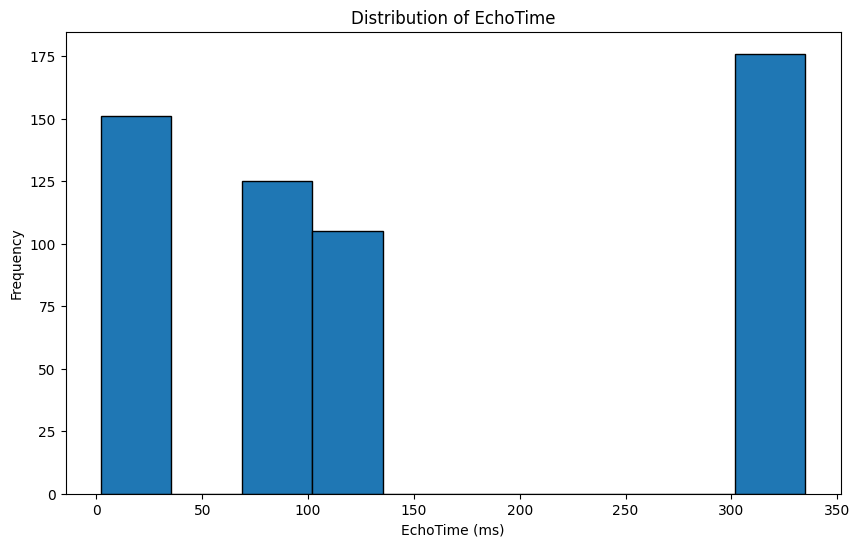

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df_combined_MRI['EchoTime'] = df_combined_MRI['EchoTime'].astype('float')
print(df_combined_MRI[['PatientID','EchoTime']])
# Histogram of EchoTime
plt.figure(figsize=(10, 6))
plt.hist(df_combined_MRI['EchoTime'], bins=10, edgecolor='k')
plt.title('Distribution of EchoTime')
plt.xlabel('EchoTime (ms)')
plt.ylabel('Frequency')
plt.show()

**Scatter Plots**:
   - **What it shows**: Relationships between two different parameters, like EchoTime vs. SliceThickness.
   - **Usage**: Identify correlations or patterns between different MRI parameters.

**EchoTime (TE)**: Time between the RF pulse and the peak of the echo signal (in milliseconds).
**EchoTime (TE)**: Longer TE values (e.g., 335 ms) often highlight water content, which can be used to identify abnormalities.
**SliceThickness**: Thickness of each image slice (in millimeters).


In [25]:
#Checking for SLiceThickness

#filter_slicethick = df_combined_MRI[df_combined_MRI['SliceThickness'].isin([10,5,1])]

filter_slicethick = df_combined_MRI[df_combined_MRI['SliceThickness'] == (5)]
filter_slicethick[['PatientID','BodyPartExamined','EchoTime','SliceThickness']]

,PatientID,BodyPartExamined,EchoTime,SliceThickness
0,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,CSPINE,120.000,5
1,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,CSPINE,120.000,5
2,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,CSPINE,120.000,5
3,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,CSPINE,120.000,5
4,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,CSPINE,120.000,5
...,...,...,...,...
376,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,CSPINE,2.119,5
377,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,CSPINE,2.119,5
378,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,CSPINE,2.119,5
379,049dacd8766cf741ad32d3a3049e49528dc342646d0ecc...,CSPINE,2.119,5


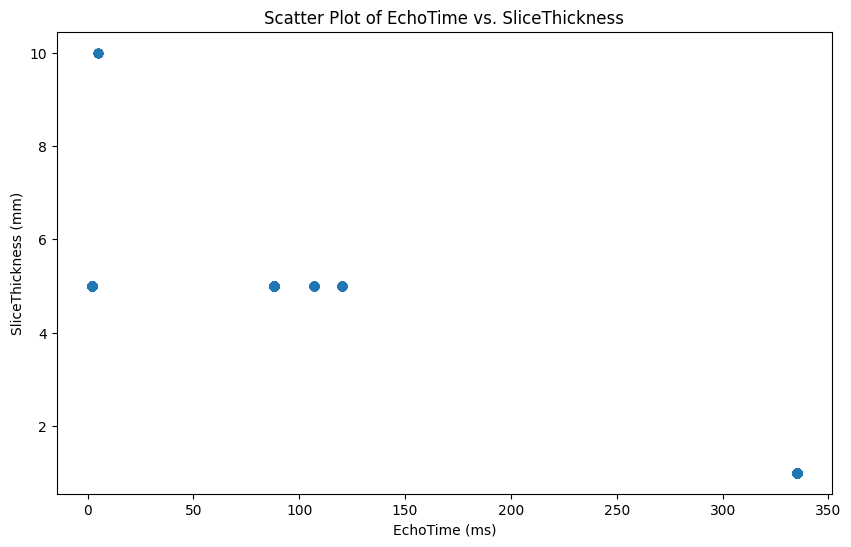

In [26]:
#print(df_combined_MRI[['PatientID','EchoTime','SliceThickness']])

plt.figure(figsize=(10,6))
plt.scatter(x='EchoTime',y='SliceThickness',data=df_combined_MRI)
plt.title("Scatter Plot of EchoTime vs. SliceThickness")
plt.xlabel('EchoTime (ms)')
plt.ylabel('SliceThickness (mm)')
plt.show()

## Analyse KaggleMRI data

In [27]:
#pd.set_option('display.max_rows', None)
df_KaggleMRI.head()

,AccessionNumber,AcquisitionDate,AcquisitionDuration,AcquisitionMatrix,AcquisitionNumber,AcquisitionTime,AdditionalPatientHistory,AdmittingDiagnosesDescription,Allergies,B1rms,...,TemporalPositionIdentifier,VideoImageFormatAcquired,WindowCenter,WindowWidth,dBdt,ImageComments,LossyImageCompression,SequenceName,TransmitCoilName,WindowCenterWidthExplanation
0,Labutina,20231101,178.5,"[0, 260, 162, 0]",13,192355.99,,,,1.836612582206726,...,1,,1070,1860,43.9957160949707,NaN,NaN,NaN,NaN,NaN
1,Labutina,20231101,178.5,"[0, 260, 162, 0]",13,192355.99,,,,1.836612582206726,...,1,,605,1051,43.9957160949707,NaN,NaN,NaN,NaN,NaN
2,Labutina,20231101,178.5,"[0, 260, 162, 0]",13,192355.99,,,,1.836612582206726,...,1,,1534,2666,43.9957160949707,NaN,NaN,NaN,NaN,NaN
3,Labutina,20231101,178.5,"[0, 260, 162, 0]",13,192355.99,,,,1.836612582206726,...,1,,913,1587,43.9957160949707,NaN,NaN,NaN,NaN,NaN
4,Labutina,20231101,178.5,"[0, 260, 162, 0]",13,192355.99,,,,1.836612582206726,...,1,,721,1253,43.9957160949707,NaN,NaN,NaN,NaN,NaN


In [28]:
df_KaggleMRI.shape

(381, 166)

In [29]:
df_KaggleMRI['ScanOptions'].value_counts()
df_KaggleMRI['BodyPartExamined'].value_counts()
df_KaggleMRI['CodeMeaning'].value_counts()

CodeMeaning
    381
Name: count, dtype: int64

## Check for rows with null values

In [30]:
# Print the columns with missing values - confirmation
print(df_KaggleMRI.isnull().sum())

cols_all_null = df_KaggleMRI.columns[df_KaggleMRI.isnull().any()] 
print('ANY COLS WITH NULL',cols_all_null)

AccessionNumber                   0
AcquisitionDate                   0
AcquisitionDuration               0
AcquisitionMatrix                 0
AcquisitionNumber                 0
                               ... 
ImageComments                   306
LossyImageCompression           306
SequenceName                    306
TransmitCoilName                306
WindowCenterWidthExplanation    306
Length: 166, dtype: int64
ANY COLS WITH NULL Index(['InversionTime', 'ImageComments', 'LossyImageCompression',
       'SequenceName', 'TransmitCoilName', 'WindowCenterWidthExplanation'],
      dtype='object')


## Check Individual columns for Null and Non null values

In [31]:
kaggle_with_nulls = df_KaggleMRI[df_KaggleMRI.isnull().any(axis=1)]
#print(kaggle_with_nulls)

# Check if column 'VideoImageFormatAcquired' has all null values 
videohas_non_null = df_KaggleMRI['VideoImageFormatAcquired'].notnull().any()
print('video has non null',videohas_non_null)

videonon_null_count = df_KaggleMRI['VideoImageFormatAcquired'].notnull().sum()
videonull_count = df_KaggleMRI['VideoImageFormatAcquired'].isnull().sum()

print(f"Non-null values in 'VideoImageFormatAcquired': {videonon_null_count}")
print(f"Null values in 'VideoImageFormatAcquired': {videonull_count}")

# Column 'VideoImageFormatAcquired' with non-null values
Videonon_null_values = df_KaggleMRI['VideoImageFormatAcquired'][df_KaggleMRI['VideoImageFormatAcquired'].notnull()] 
#print('VideoImageFormatAcquired non-null', Videonon_null_values
#Note: VideoImage column has all null values only. I checked.

# Check if column 'InversionTime' has all null values
InversionTimehas_non_null = df_KaggleMRI['InversionTime'].notnull().any()
print('InversionTimenull_count has non null',InversionTimehas_non_null)

InversionTimenon_null_count = df_KaggleMRI['InversionTime'].notnull().sum()
InversionTimenull_count = df_KaggleMRI['InversionTime'].isnull().sum()

print(f"Non-null values in 'InversionTime': {InversionTimenon_null_count}")
print(f"Null values in 'InversionTime': {InversionTimenull_count}")

# Column 'InversionTime' with non-null values
InversionTimenon_null_values = df_KaggleMRI['InversionTime'][df_KaggleMRI['InversionTime'].notnull()] 
#print('InversionTime non-null', InversionTimenon_null_values)
#Note: Some rows has NaN values, some have 2500.0


# Check if column 'ImageComments' has all null values
ImageCommentshas_non_null = df_KaggleMRI['ImageComments'].notnull().any()
print('ImageCommentsnull_count has non null',ImageCommentshas_non_null)

ImageCommentsnon_null_count = df_KaggleMRI['ImageComments'].notnull().sum()
ImageCommentsnull_count = df_KaggleMRI['ImageComments'].isnull().sum()

print(f"Non-null values in 'ImageComments': {ImageCommentsnon_null_count}")
print(f"Null values in 'ImageComments': {ImageCommentsnull_count}")

# Column 'ImageComments' with non-null values
ImageCommentsnon_null_values = df_KaggleMRI['ImageComments'][df_KaggleMRI['ImageComments'].notnull()] 
#print('ImageComments non-null', ImageCommentsnon_null_values)
#Note: All rows has NaN values


# Check if column 'LossyImageCompression' has all null values
LossyImageCompressionshas_non_null = df_KaggleMRI['LossyImageCompression'].notnull().any()
print('LossyImageCompressionnull_count has non null',LossyImageCompressionshas_non_null)

LossyImageCompressionnon_null_count = df_KaggleMRI['LossyImageCompression'].notnull().sum()
LossyImageCompressionnull_count = df_KaggleMRI['LossyImageCompression'].isnull().sum()

print(f"Non-null values in 'LossyImageCompression': {LossyImageCompressionnon_null_count}")
print(f"Null values in 'LossyImageCompression': {LossyImageCompressionnull_count}")

# Column 'LossyImageCompression' with non-null values
LossyImageCompressionnon_null_values = df_KaggleMRI['LossyImageCompression'][df_KaggleMRI['LossyImageCompression'].notnull()] 
#print('LossyImageCompression non-null', LossyImageCompressionnon_null_values)
#Note: All rows has 00 values


# Check if column 'SequenceName' has all null values
SequenceNamehas_non_null = df_KaggleMRI['SequenceName'].notnull().any()
print('SequenceNamenull_count has non null',SequenceNamehas_non_null)

SequenceNamenon_null_count = df_KaggleMRI['SequenceName'].notnull().sum()
SequenceNamenull_count = df_KaggleMRI['SequenceName'].isnull().sum()

print(f"Non-null values in 'SequenceName': {SequenceNamenon_null_count}")
print(f"Null values in 'SequenceName': {SequenceNamenull_count}")

# Column 'SequenceName' with non-null values
SequenceNamenon_null_values = df_KaggleMRI['SequenceName'][df_KaggleMRI['SequenceName'].notnull()] 
#print('SequenceName non-null', SequenceNamenon_null_values)
#Note: All rows has empty values listed as non-null


# COlumn RequestedProcedureDescription
RequestedProcedureDescriptionnon_null_values = df_KaggleMRI['RequestedProcedureDescription'][df_KaggleMRI['RequestedProcedureDescription'].notnull()] 
#print('RequestedProcedureDescription non-null', RequestedProcedureDescriptionnon_null_values)
#Note: All rows has empty values listed as non-null


video has non null True
Non-null values in 'VideoImageFormatAcquired': 381
Null values in 'VideoImageFormatAcquired': 0
InversionTimenull_count has non null True
Non-null values in 'InversionTime': 50
Null values in 'InversionTime': 331
ImageCommentsnull_count has non null True
Non-null values in 'ImageComments': 75
Null values in 'ImageComments': 306
LossyImageCompressionnull_count has non null True
Non-null values in 'LossyImageCompression': 75
Null values in 'LossyImageCompression': 306
SequenceNamenull_count has non null True
Non-null values in 'SequenceName': 75
Null values in 'SequenceName': 306


In [32]:
df_MYMRI.head()

,AccessionNumber,AcquisitionDate,AcquisitionMatrix,AcquisitionNumber,AcquisitionTime,AngioFlag,BitsAllocated,BitsStored,Columns,ContentDate,...,StudyID,StudyInstanceUID,StudyStatusID,StudyTime,TransmitCoilName,VariableFlipAngleFlag,WindowCenter,WindowCenterWidthExplanation,WindowWidth,dBdt
0,19078400556130,20111110,"[0, 256, 250, 0]",1,93522.335,N,16,12,256,20111110,...,19078400556130,1.2.124.113532.30.20265.59073.20111107.74456.1...,SCHEDULED,93416.265,Body,Y,240,Algo1,532,0
1,19078400556130,20111110,"[0, 256, 250, 0]",1,93522.335,N,16,12,256,20111110,...,19078400556130,1.2.124.113532.30.20265.59073.20111107.74456.1...,SCHEDULED,93416.265,Body,Y,245,Algo1,544,0
2,19078400556130,20111110,"[0, 256, 250, 0]",1,93522.335,N,16,12,256,20111110,...,19078400556130,1.2.124.113532.30.20265.59073.20111107.74456.1...,SCHEDULED,93416.265,Body,Y,157,Algo1,373,0
3,19078400556130,20111110,"[0, 256, 250, 0]",1,93522.335,N,16,12,256,20111110,...,19078400556130,1.2.124.113532.30.20265.59073.20111107.74456.1...,SCHEDULED,93416.265,Body,Y,241,Algo1,536,0
4,19078400556130,20111110,"[0, 256, 250, 0]",1,93522.335,N,16,12,256,20111110,...,19078400556130,1.2.124.113532.30.20265.59073.20111107.74456.1...,SCHEDULED,93416.265,Body,Y,232,Algo1,523,0


In [33]:
df_MYMRI['ScanOptions'].value_counts()

ScanOptions
['IR', 'PFP']    176
Name: count, dtype: int64

## Identify Columns with Null values in MYMRI dataset

In [34]:
MYMRIcols_all_null = df_MYMRI.columns[df_MYMRI.isnull().any()] 
print('MYMRI ANY COLS WITH NULL',MYMRIcols_all_null)
# Note: 2 columns which has null values has all NaN.

MYMRI ANY COLS WITH NULL Index(['PositionReferenceIndicator', 'ReferringPhysicianName'], dtype='object')
